In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# LOAD DATA
BikeSharing = pd.read_csv('G:\\DS----PYTHON\\PYTHON ----   MAY ---08\\bike projct\\1584513771_bikesharingdemandanalysis\\hour.csv')
BikeSharing

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [3]:
# check null values

BikeSharing.isna().sum()

# None of the columns contains NULL values

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped

np.sum((BikeSharing['casual'] + BikeSharing['registered']) != BikeSharing['cnt'])

# no records found of above condition

0

In [5]:
# Month values should be 1-12 only

BikeSharing[(BikeSharing['mnth'] <1) & (BikeSharing['mnth'] >12)]

# no records found of above condition, means month values lies b/w 1 to 12

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [6]:
# Hour values should be 0-23

BikeSharing[(BikeSharing['hr'] <0) & (BikeSharing['hr'] >23)]

# no records found of above condition, means hour values lies b/w 0 to 23

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [7]:
BikeSharing.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# Create a new dataframe named inp1.

# now we will copy our main dataframe to inp1, for that our main dataframe should not be affected acc to our further calc.

inp1 = BikeSharing.copy(deep=True)
inp1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped 
# too. The date column dteday will not be used in the model building, and therefore needs to be dropped. 

inp1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
inp1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


--- 

## Univariate analysis:  

In [10]:
# Describe the numerical fields in the dataset using pandas describe method.

inp1.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


<AxesSubplot:ylabel='Density'>

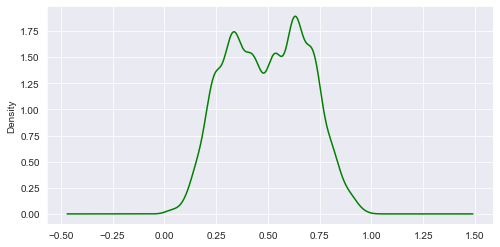

In [11]:
# Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

plt.figure(figsize=(8,4))
inp1['temp'].plot.density(color='g')

# around 60 degree temp are the most centrality temp. 
# but around 30degree to 60degree temp is more occurance temp that people work through bike sharing.
# on 50degree temp people quite less sharing bikes.
# as we see there is only one record which has temp 100degree.

In [12]:
inp1[(inp1['temp']==1.00) | (inp1['temp']>1.00)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
13163,3,1,7,16,0,6,0,1,1.0,0.8636,0.19,0.1642,294


In [13]:
inp1[(inp1['temp']>0) & (inp1['temp']<0.10)]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
189,1,0,1,4,0,0,0,1,0.08,0.0909,0.53,0.1940,1
190,1,0,1,5,0,0,0,1,0.08,0.0909,0.53,0.1940,1
192,1,0,1,7,0,0,0,1,0.08,0.0909,0.53,0.1940,6
476,1,0,1,21,0,5,1,1,0.08,0.0758,0.38,0.2836,41
477,1,0,1,22,0,5,1,1,0.06,0.0303,0.41,0.3881,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8726,1,1,1,10,0,3,1,1,0.06,0.1061,0.45,0.0000,64
8727,1,1,1,11,0,3,1,2,0.08,0.1212,0.42,0.0896,46
9650,1,1,2,1,0,0,0,3,0.08,0.0455,0.79,0.4627,24
9656,1,1,2,7,0,0,0,1,0.08,0.0909,0.53,0.1940,18


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


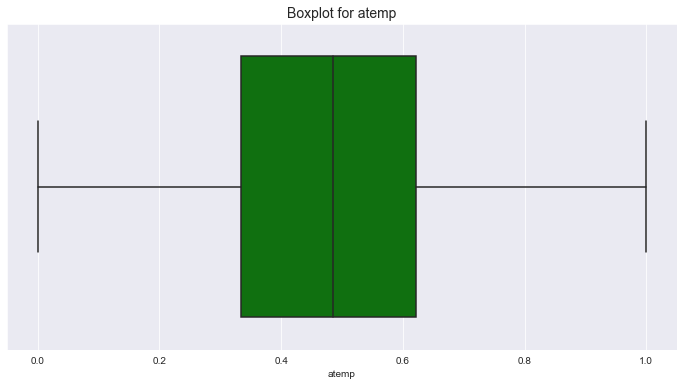

In [14]:
# Boxplot for atemp 
# Are there any outliers?

plt.figure(figsize=(12,6))
sns.boxplot(inp1['atemp'],color='g')
plt.title('Boxplot for atemp', fontsize=14)
plt.xlabel('atemp', fontsize=10)
plt.show()

# here, no outlier present in "temp"  column

In [15]:
inp1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


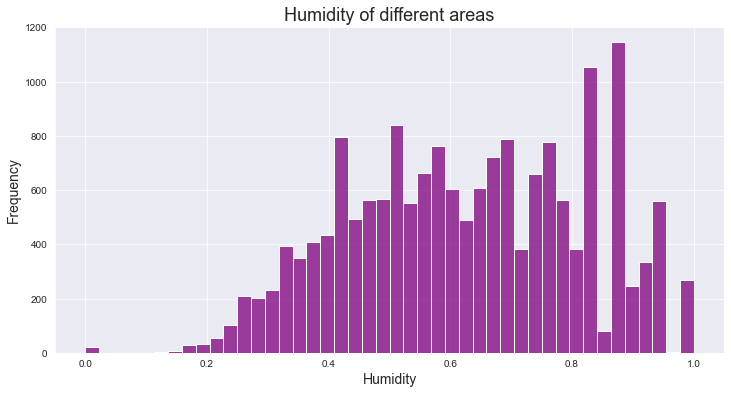

In [16]:
# Histogram for hum
# Do you detect any abnormally high values?

plt.figure(figsize=(12,6))
sns.histplot(inp1['hum'], color='purple')
plt.title('Humidity of different areas', fontsize=18)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Most of the time humidity are spreading around 0.6 to 0.9
# Below 0.5, there are less no of places, 
# but near around 0.85, there are high no of places 
# We can conclude that most of places have high humidity
# Here, only 2 times where high humidity places crosses 1000 places at 0.82 to 0.90
# No abnormaly high values visible

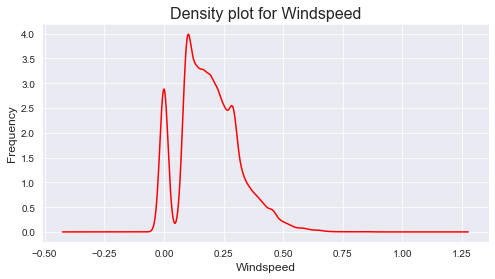

In [17]:
# Density plot for windspeed

plt.figure(figsize=(8,4))
inp1['windspeed'].plot.density(color='r')
plt.title('Density plot for Windspeed', fontsize=16)
plt.xlabel('Windspeed', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Windspeed are very much fluctuate acc. to different places
# most of the times, windspeed are varrying within 0.50
# this plot is quite same as right skewed, means there are some outliers present which values are high.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

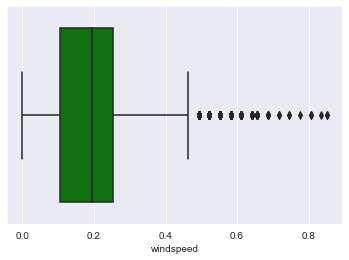

In [18]:
sns.boxplot(inp1['windspeed'],color='g')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


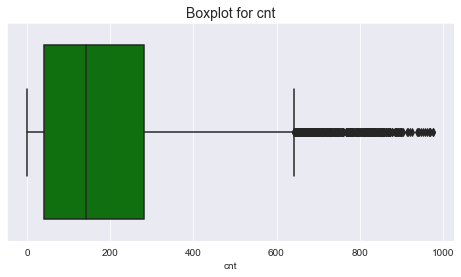

In [19]:
# Box and density plot for cnt – this is the variable of interest 
# Do you see any outliers in the boxplot? 


# Boxplot for cnt variable
plt.figure(figsize=(8,4))
sns.boxplot(inp1['cnt'],color='g')
plt.title('Boxplot for cnt', fontsize=14)
plt.xlabel('cnt', fontsize=10)
plt.show()

# as we see lots of outliers present in our plot.
# max value is around 610 and median lies around 180.
# most of records i.e cnt lies b/w 50 to 250

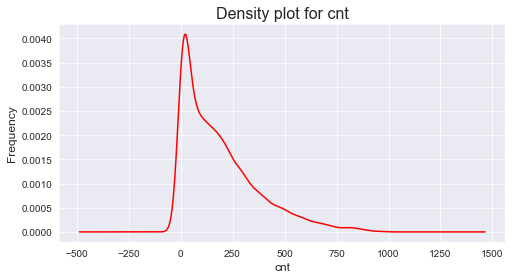

In [20]:
# Does the density plot provide a similar insight?

plt.figure(figsize=(8,4))
inp1['cnt'].plot.density(color='r')
plt.title('Density plot for cnt', fontsize=16)
plt.xlabel('cnt', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# density plot is like right skewed curve
# it is seen  that lots of outliers present in cnt columns and those are very high values

## Outlier treatment: 

In [21]:
# Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that 
# they don’t skew the analysis and the model. 

inp1['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [22]:
# we will  remove all those outliers by 1.5 IQR RULE

def outlier_detect(column):
    # sort the column in ascending order
    sorted(column)
    
    # get values of Q1 AND Q3
    Q1,Q3 = np.percentile(column, [25,75])
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate lower range 
    lr = Q1 - (1.5 * IQR)
    
    # Calculate upper range 
    ur = Q3 + (1.5 * IQR)
    
    return lr,ur

In [23]:
# Implement function

lowerRange, upperRange = outlier_detect(inp1['cnt'])

print(lowerRange)
print(upperRange)

-321.5
642.5


In [24]:
# Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

np.percentile(inp1['cnt'],[10, 25, 50, 75, 90, 95, 99])

# array([  9.  ,  40.  , 142.  , 281.  , 451.2 , 563.1 , 782.22])

array([  9.  ,  40.  , 142.  , 281.  , 451.2 , 563.1 , 782.22])

In [25]:
# Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.

inp2 = inp1[(inp1['cnt'] >=lowerRange) & (inp1['cnt'] <= upperRange)]
inp2

# we have considered lowerRange and upperRange as a threshold values and store the data into inp2 dataframe

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


--- 

## Bivariate analysis

In [26]:
# Make boxplot for cnt vs. hour

# What kind of pattern do you see?

# Make boxplot for cnt vs. weekday

# Is there any difference in the rides by days of the week?

# Make boxplot for cnt vs. month

# Look at the median values. Any month(s) that stand out?

# Make boxplot for cnt vs. season

# Which season has the highest rides in general? Expected?

# Make a bar plot with the median value of cnt for each hr

# Does this paint a different picture from the box plot?

# Make a correlation matrix for variables atemp, temp, hum, and windspeed

# Which variables have the highest correlation?

In [27]:
inp2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


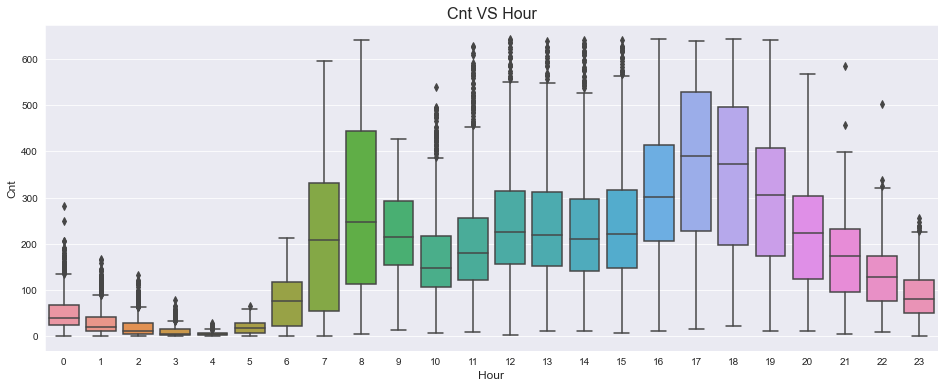

In [28]:
# Make boxplot for cnt vs. hour
# What kind of pattern do you see?

plt.figure(figsize=(16,6))
sns.boxplot(x='hr', y='cnt', data=inp2)
plt.title('Cnt VS Hour', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Cnt', fontsize=12)
plt.show()

# In our plot,
            # from 7 - 8 AM cnt are higher and from 17 - 19 PM cnt are higher,
            # it means during office times people uses bike sharing to reach their jobs.
            # So, Bike sharing companies should provide more bikes during those times to meet the targeted demand.
            # During early morning very less people uses services and demand for services are quite good till 9 at the night.

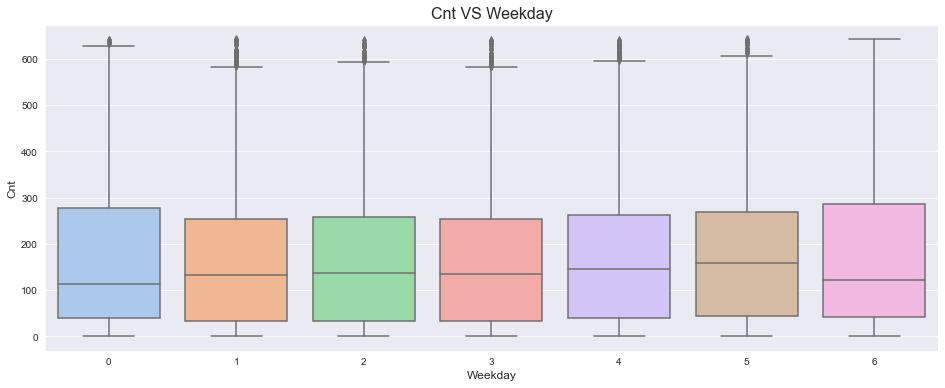

In [29]:
# Make boxplot for cnt vs. weekday
# Is there any difference in the rides by days of the week?

plt.figure(figsize=(16,6))
sns.boxplot(x='weekday', y='cnt', data=inp2, palette="pastel")
plt.title('Cnt VS Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Cnt', fontsize=12)
plt.show()

# There are no more such difference b/w days in weekdays.
# At day 5 median value is quite high than others.

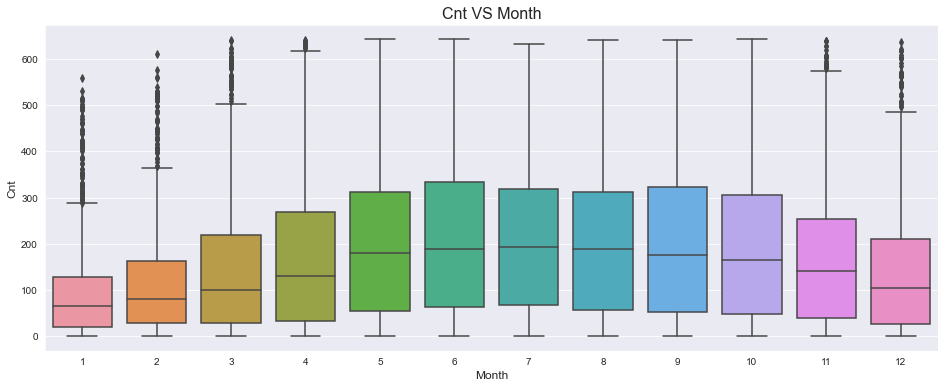

In [30]:
# Make boxplot for cnt vs. month
# Look at the median values. Any month(s) that stand out?

inp2['mnth'].unique()

plt.figure(figsize=(16,6))
sns.boxplot(x='mnth', y='cnt', data=inp2)
plt.title('Cnt VS Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cnt', fontsize=12)
plt.show()

# In our plot,
             # In Winter and Early Spring people uses least bike sharing services.
             # During May to October, it has high demand for bike sharing services.
             # In June, people uses maximum no. of bike sharing services, 
             # So during May-October, company should allow more bikes  to share to mitigate the demand. 

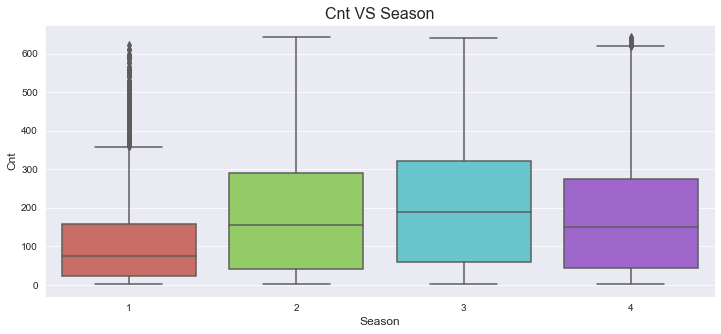

In [31]:
# Make boxplot for cnt vs. season  [1:spring, 2:summer, 3:fall, 4:winter]
# Which season has the highest rides in general? Expected?

inp2['season'].unique()

plt.figure(figsize=(12,5))
sns.boxplot(x='season', y='cnt', data=inp2, palette="hls")
plt.title('Cnt VS Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Cnt', fontsize=12)
plt.show()

# 1:spring, people uses least amount of services
# 3:fall, people uses high amount of services

In [32]:
# Make a bar plot with the median value of cnt for each hr
# Does this paint a different picture from the box plot?

med_hr_cnt = inp2.groupby(['hr'])['cnt'].median()
med_hr_cnt

hr
0      40.0
1      20.0
2      11.0
3       6.0
4       6.0
5      19.0
6      76.0
7     208.0
8     246.5
9     216.0
10    147.0
11    180.0
12    226.0
13    220.0
14    210.5
15    222.5
16    302.0
17    390.0
18    372.0
19    306.0
20    223.5
21    173.5
22    129.0
23     80.0
Name: cnt, dtype: float64

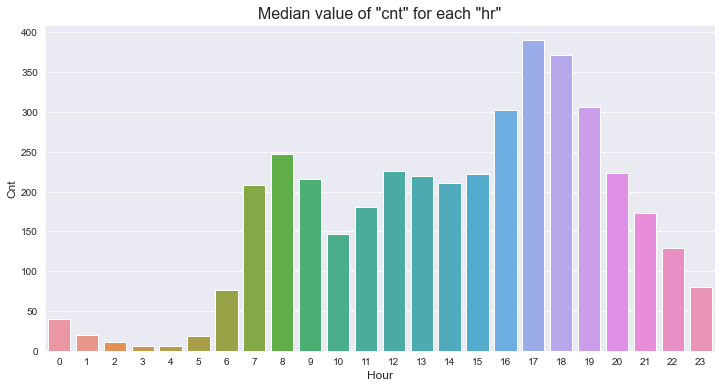

In [33]:
# creating a barplot with the median value of "cnt" for each "hr"

plt.figure(figsize=(12,6))
sns.barplot(x= med_hr_cnt.keys(), y =med_hr_cnt.values)
plt.title('Median value of "cnt" for each "hr"', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Cnt', fontsize=12)
plt.show()

# at 5PM, median value is highest and from 4-7PM has relatively high median values

In [34]:
med_hr_cnt.keys()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hr')

In [35]:
med_hr_cnt.values

array([ 40. ,  20. ,  11. ,   6. ,   6. ,  19. ,  76. , 208. , 246.5,
       216. , 147. , 180. , 226. , 220. , 210.5, 222.5, 302. , 390. ,
       372. , 306. , 223.5, 173.5, 129. ,  80. ])

In [36]:
# Make a correlation matrix for variables atemp, temp, hum, and windspeed
# Which variables have the highest correlation?

varias = ['atemp', 'temp', 'hum', 'windspeed']

corrs = inp2[varias].corr()
corrs

# temp and atemp variables has highest correlation i.e 0.988276

,atemp,temp,hum,windspeed
atemp,1.000000,0.988276,-0.037332,-0.068713
temp,0.988276,1.000000,-0.054769,-0.028585
hum,-0.037332,-0.054769,1.000000,-0.288888
windspeed,-0.068713,-0.028585,-0.288888,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'atemp'),
  Text(0, 1.5, 'temp'),
  Text(0, 2.5, 'hum'),
  Text(0, 3.5, 'windspeed')])

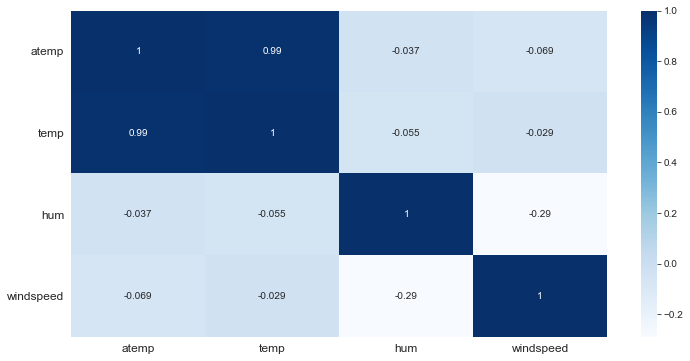

In [37]:
# creating a heatmap using these variables

plt.figure(figsize=(12,6))
sns.heatmap(corrs, annot=True, cmap='Blues')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation='horizontal')

## Data preprocessing

In [38]:
# Treating mnth column

# For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.
# we will copy our dataframe inp2 with inp3, for that our main dataframe will be intact

inp3 = inp2.copy(deep=True)
inp3.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [39]:
# # "isin" will use, it turns a single string into a list of one element.

inp3['mnth'][inp3['mnth'].isin([5,6,7,8,9,10])] =5
inp3['mnth'].unique()

<ipython-input-39-8db2def5de67>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['mnth'][inp3['mnth'].isin([5,6,7,8,9,10])] =5


array([ 1,  2,  3,  4,  5, 11, 12], dtype=int64)

In [40]:
# Treating hr column
# Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. Again, 
# the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

inp3['hr'][inp3['hr'].isin([0,1,2,3,4,5])] =5
inp3['hr'][inp3['hr'].isin([11,12,13,14,15])]=11

<ipython-input-40-3aec54f8e34b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['hr'][inp3['hr'].isin([0,1,2,3,4,5])] =5
<ipython-input-40-3aec54f8e34b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['hr'][inp3['hr'].isin([11,12,13,14,15])]=11


In [41]:
inp3['hr'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

In [42]:
inp3.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [43]:
# Get dummy columns for season, weathersit, weekday, mnth, and hr. You needn’t club these further as the levels seem to have
# different values for the median cnt, when seen from the box plots.

dum_cols = ['season','weathersit', 'weekday', 'mnth','hr']

inp3=pd.concat( [pd.get_dummies(inp3, columns=dum_cols, drop_first=True), inp3.iloc[:,[4,5,6,8,9,10,11]] ], axis=1)


In [44]:
inp3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22',
       'hr_23', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed'],
      dtype='object')

In [45]:
inp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            16874 non-null  int64  
 1   holiday       16874 non-null  int64  
 2   workingday    16874 non-null  int64  
 3   temp          16874 non-null  float64
 4   atemp         16874 non-null  float64
 5   hum           16874 non-null  float64
 6   windspeed     16874 non-null  float64
 7   cnt           16874 non-null  int64  
 8   season_2      16874 non-null  uint8  
 9   season_3      16874 non-null  uint8  
 10  season_4      16874 non-null  uint8  
 11  weathersit_2  16874 non-null  uint8  
 12  weathersit_3  16874 non-null  uint8  
 13  weathersit_4  16874 non-null  uint8  
 14  weekday_1     16874 non-null  uint8  
 15  weekday_2     16874 non-null  uint8  
 16  weekday_3     16874 non-null  uint8  
 17  weekday_4     16874 non-null  uint8  
 18  weekday_5     16874 non-nu

In [46]:
# Train test split: Apply 70-30 split.
# call the new dataframes df_train and df_test

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_train, df_test = train_test_split(inp3, train_size = 0.7,random_state = 100)


In [47]:
# Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. 
# y_train should be the cnt column from inp3 and X_train should be all other columns. 

y_train = df_train.pop('cnt')
X_train = df_train


In [48]:
y_test = df_test.pop('cnt')
X_test = df_test


## Model building

In [49]:
## Use linear regression as the technique

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train,y_train)

LinearRegression()

In [52]:
model.intercept_

-91.47106577025653

In [53]:
model.coef_

array([ 6.67431100e+01,  4.51087355e+14,  9.49705637e+13,  8.24835421e+12,
       -8.09540685e+12, -1.25391357e+13, -3.51843680e+12,  3.88529356e+01,
        2.65462582e+01,  6.49176964e+01, -9.25057647e+00, -6.07974201e+01,
       -9.24960454e+01, -7.81362018e+13, -6.01121342e+13, -4.20880666e+13,
       -2.40639990e+13, -6.03993133e+12,  1.08144406e+14,  4.99656936e+00,
        9.43825618e+00,  2.70312005e+00,  9.08745050e+00, -7.59785127e+00,
       -3.54331386e+00,  5.74953307e+01,  1.87632688e+02,  2.77452729e+02,
        1.86289132e+02,  1.35630171e+02,  1.82721374e+02,  2.44768071e+02,
        3.36085788e+02,  3.16516385e+02,  2.63076659e+02,  1.84681132e+02,
        1.36296666e+02,  9.70615232e+01,  5.83777196e+01, -3.54927086e+14,
       -1.80240676e+13,  1.18970573e+12, -8.24835421e+12,  8.09540685e+12,
        1.25391357e+13,  3.51843680e+12])

In [54]:
# Report the r2 on the train set 
from sklearn.metrics import r2_score

y_train_pred= model.predict(X_train)
r2_score(y_train, y_train_pred)


0.6710973216706237

In [55]:
# From the above model we get R2 score is 67% accuracy based on the training set

--- 

In [56]:
## 11. Make predictions on test set and report R2.

y_test_pred= model.predict(X_test)
r2_score(y_test, y_test_pred)




0.6667292936019416

In [57]:
# From the above model we get R2 score is 66% accuracy based on the test set